## Section 1: Loading Data ##
This section will only be run once and does not need to be run again

In [1]:
!pip install convokit

I first shortened the csv files for enron, medium articles, and un general debates. Since we'll only be sampling a subset of <500 from each, we don't need to load the whole file

In [3]:
#DONT RUN THIS ANYMORE
from datasets import load_dataset, Dataset
from convokit import Corpus, download


#TRAIN SETS, choosing 300 samples frome each written text set
num_samples = 300

""" Formal"""
ds_un_docs = load_dataset("Helsinki-NLP/un_pc", "en-es")
ds_un_docs_sub = ds_un_docs["train"].shuffle(seed=42).select(range(num_samples))
del ds_un_docs

ds_un_debates = load_dataset('csv', data_files="source_datasets/shortened-un-general-debates.csv") # formal]
ds_un_debates_sub = ds_un_debates["train"].shuffle(seed=42).select(range(num_samples))
del ds_un_debates

#city council meetings instead https://huggingface.co/datasets/lytang/MeetingBank-transcript?row=8&library=datasets
ds_business_meetings = load_dataset("lytang/MeetingBank-transcript") 
ds_business_meetings_sub = ds_business_meetings["train"].shuffle(seed=42).select(range(num_samples))
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
del ds_business_meetings

""" Semi-formal"""
ds_enron= load_dataset('csv', data_files='source_datasets/shortened-enron_labeled_curated.csv') #enron, very formal business emails probably?
ds_enron_sub = ds_enron["train"].shuffle(seed=42).select(range(num_samples))
del ds_enron

ds_medium = load_dataset('csv', data_files='source_datasets/shortened-medium_articles.csv') #medium articles, academic but also likely less formal ? community contributions
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
ds_medium_sub = ds_medium["train"].shuffle(seed=42).select(range(num_samples))
del ds_medium


ds_podcast_news = load_dataset("Whispering-GPT/lex-fridman-podcast")
ds_podcast_news_sub = ds_podcast_news["train"].shuffle(seed=42).select(range(num_samples//5))#podcasts are long so only gonna use 100 samples
del ds_podcast_news

"""Educational"""
ds_edu = load_dataset("Locutusque/UltraTextbooks") #synthetic and human written textbooks..... acdademic / formal
#https://huggingface.co/datasets/fabiochiu/medium-articles
ds_edu_sub = ds_edu["train"].shuffle(seed=42).select(range(num_samples))
del ds_edu

# khan academy dataset
ds_khan_edu = load_dataset("iblai/ibl-khanacademy-transcripts")
ds_khan_edu_sub = ds_khan_edu["train"].shuffle(seed=42).select(range(num_samples))
del ds_khan_edu

"""Informal"""
ds_sms = load_dataset("ucirvine/sms_spam") #should only use ham labels, text messages, informal
#filtering out the spam label - only getting legitimate texts
ds_sms_filtered = ds_sms["train"].filter(lambda example: example['label'] == 0)
ds_sms_sub = ds_sms_filtered.shuffle(seed=42).select(range(num_samples + 100)) #adding 100 just because messages are short
del ds_sms

ds_telephone_convos = Corpus(filename=download("switchboard-corpus"))
data = ds_telephone_convos.get_utterances_dataframe() 
data_list = data.to_dict(orient="records")
ds_telephone_convos = Dataset.from_list(data_list)
ds_telephone_sub = ds_telephone_convos.shuffle(seed=42).select(range(200, 200 + num_samples))
del ds_telephone_convos

#this cell ran in 21 minutes (probably don't have to load the whole dataset?)

Generating train split:  25%|██▍       | 6180768/25227004 [00:21<01:05, 288622.03 examples/s]


DatasetGenerationError: An error occurred while generating the dataset

In [5]:
ds_telephone_sub[0:1]["text"]

['[ Have, + have ] you gone straight through? /']

In [ ]:
#combine
from datasets import Dataset, concatenate_datasets
import random

un_docs_dataset = Dataset.from_dict({"text": ds_un_docs_sub["translation"], 
                                     "source": ["un_corpus"] * len(ds_un_docs_sub),
                                     "formality": ["formal"] * len(ds_un_docs_sub)})
#print(un_docs_dataset[:2])
medium_dataset = Dataset.from_dict({"text": ds_medium_sub["text"], 
                                    "source": ["medium"] * len(ds_medium_sub),
                                    "formality": ["semiformal"] * len(ds_medium_sub)})
edu_dataset = Dataset.from_dict({"text": ds_edu_sub["text"], 
                                 "source": ["textbooks"] * len(ds_edu_sub),
                                 "formality": ["educational"] * len(ds_edu_sub)})
sms_dataset = Dataset.from_dict({"text": ds_sms_sub["sms"], 
                                 "source": ["sms"] * len(ds_sms_sub), 
                                 "formality": ["informal"] * len(ds_sms_sub)})
enron_dataset = Dataset.from_dict({"text": ds_enron_sub["email"], 
                                   "source": ["enron_emails"] * len(ds_enron_sub), 
                                   "formality": ["formal"] * len(ds_enron_sub)})



podcast_news_dataset = Dataset.from_dict({"text": ds_podcast_news_sub["text"], 
                                     "source": ["podcasts"] * len(ds_podcast_news_sub), 
                                     "formality": ["semiformal"] * len(ds_podcast_news_sub)})
un_debates_dataset = Dataset.from_dict({"text": ds_un_debates_sub["text"], 
                                   "source": ["un_debates"] * len(ds_un_debates_sub),
                                   "formality": ["formal"] * len(ds_un_debates_sub)})
khan_edu_dataset = Dataset.from_dict({"text": ds_khan_edu_sub["content"], 
                                 "source": ["khan_academy"] * len(ds_khan_edu_sub),
                                 "formality": ["educational"] * len(ds_khan_edu_sub)})
print(khan_edu_dataset[:2])
telephone_dataset = Dataset.from_dict({"text": ds_telephone_sub["text"], 
                                    "source": ["telephone_convos"] * len(ds_telephone_sub), 
                                    "formality": ["informal"] * len(ds_telephone_sub)})
business_meetings_dataset = Dataset.from_dict({"text": ds_business_meetings_sub["source"], 
                                 "source": ["business_meetings"] * len(ds_business_meetings_sub),
                                 "formality": ["formal"] * len(ds_business_meetings_sub)})



{'text': ['WEBVTT\nKind: captions\nLanguage: en\n\n00:00:00.944 --> 00:00:03.596\n(pop music)\n\n00:00:03.626 --> 00:00:07.552\nLarry: It started with just a\nfew little videos on algebra\n\n00:00:07.552 --> 00:00:11.447\nto help out a cousin who\nneeded assistance in school,\n\n00:00:11.447 --> 00:00:15.128\nand, from there, it grew\nand grew and grew into more\n\n00:00:15.128 --> 00:00:21.049\nthan 3,200 YouTube videos,\ngiving all kinds of instruction.\n\n00:00:21.049 --> 00:00:24.724\nIt\'s known as the Khan Academy,\nbut, more than just that,\n\n00:00:24.724 --> 00:00:27.231\nit\'s leading to a rethinking\nof how education is\n\n00:00:27.231 --> 00:00:30.046\ndelivered in the nation\'s\nclassrooms and at home.\n\n00:00:30.046 --> 00:00:32.466\nSalman Khan\'s new book, The One World\n\n00:00:32.466 --> 00:00:34.836\nSchool House: Education Reimagined.\n\n00:00:34.836 --> 00:00:36.391\nSal, thank you for joining us.\n\n00:00:36.391 --> 00:00:37.351\nWe appreciate it very much.\n\n00

## Section 2: Preprocessing Each Dataset ##

In [ ]:
from datasets import load_dataset, Dataset
import re #https://docs.python.org/3/library/re.html

In [ ]:
#Preprocess UN Docs

un_docs_dataset = un_docs_dataset.map(lambda item: {"text": item["text"]["en"]}) # I only want the 'en' keys
print(un_docs_dataset[:2])


Map:   0%|          | 0/300 [00:00<?, ? examples/s]

{'text': ['Mr. James Revill Consultant', '118.117. Continue efforts in requesting support to intensify the abilities of Jordan to respond to the needs of Syrian refugees who are present on Jordanian territory (Qatar);'], 'source': ['un_corpus', 'un_corpus'], 'formality': ['formal', 'formal']}


In [ ]:
#Preprocess Medium

#maybe get rid of first and last sentence because usually just has author info etc
#get rid of brackted numbers?

def preprocess_medium(text):
    #remove first and last sentence
    sentences = text.split('.')
    if len(sentences) > 2:
        text = '.'.join(sentences[1:-1])
    #bracketed numbers (citations)
    text = re.sub(r'\[\d+\]', '', text)
    return text

medium_dataset = medium_dataset.map(lambda process: {"text": preprocess_medium(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [16]:
#don't need to special process edu dataset
#Don't need to special Preprocess SMS

In [ ]:
def preprocess_enron(text):
    #get rid of Subject: line and also first three sentences or so bc they tend to be garbage...
    text = text.replace("Subject: ", "")
    first_period_index = text.find('.')
    if first_period_index != -1:
        text = text[first_period_index + 1:]

    text = re.sub(r'=', '', text)  # looks like some of the emails have equals signs in between words? will this affect euqations drasticall?
    # WE MIGHT WANT TO TRY BY TAKING OUT MOST PUNCTUATION???? IDK
    return text

enron_dataset = enron_dataset.map(lambda process: {"text": preprocess_enron(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [ ]:
def preprocess_business(text):
    # Remove speaker labels
    text = re.sub(r'Speaker \d+:', '', text)
    return text

business_meetings_dataset = business_meetings_dataset.map(lambda process: {"text": preprocess_business(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [ ]:
def preprocess_khan_text(text):
    #timestamps like 00:00:00.000 --> 00:00:01.749
    text = re.sub(r'\d{2}:\d{2}:\d{2}\.\d{3} --> \d{2}:\d{2}:\d{2}\.\d{3}', '', text)
    
    # Remove ALL CAPS names in transcript "SALMAN KHAN
    text = re.sub(r'[A-Z]{2,}( [A-Z]{2,})*:', '', text)
    
    # extra \n and spaces
    text = re.sub(r'\n+', '\n', text) 
    text = text.strip()  #whitespace
    
    return text

khan_edu_dataset = khan_edu_dataset.map(lambda process: {"text": preprocess_khan_text(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [20]:
#combine datasets
combined_written_dataset = concatenate_datasets([un_docs_dataset, medium_dataset, edu_dataset, sms_dataset, enron_dataset])
combined_written_dataset = combined_written_dataset.add_column("type", ["written"] * len(combined_written_dataset))

combined_spoken_dataset = concatenate_datasets([podcast_news_dataset, un_debates_dataset, khan_edu_dataset, telephone_dataset, business_meetings_dataset])
combined_spoken_dataset = combined_spoken_dataset.add_column("type", ["spoken"] * len(combined_spoken_dataset))

full_dataset = concatenate_datasets([combined_spoken_dataset, combined_written_dataset])

full_dataset = full_dataset.shuffle(seed=42)

In [ ]:
def preprocess_all_text(text):
    # Handle NoneType objects
    if text is None:
        return None
    
    # Remove code?? and HTML tags
    text = re.sub(r'<[^>]+>', '', text)  # HTML tags
    text = re.sub(r'```.*?```', '', text, flags=re.DOTALL)  # Removes code blocks (```code```)

    # Remove filler words
    # text = re.sub(r'\bumm\w*', '', text) #words that start with umm
    # text = re.sub(r'\boh\b', '', text)
    # text = re.sub(r'\blike\b', '', text)
    
    text = text.lower()
    #REMOVE URLS AND LINKS
    text = re.sub(r'http\S+|www\.\S+|\S+\.(com|org|net|io|co|uk|gov|edu)\S*', '', text)
    #keep basic punc
    text = re.sub(r'[^\w\s.\',;!?\-$()]', '', text)
    #remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Return None if the text is empty after preprocessing
    if not text:
        return None
    
    return text

full_dataset = full_dataset.map(lambda process: {"text": preprocess_all_text(process["text"])})
full_dataset = full_dataset.filter(lambda process: process["text"] is not None and process["text"].strip() != "")

Map:   0%|          | 0/2900 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2900 [00:00<?, ? examples/s]

Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

28299694

further preprocessing for all datasets, get rid of stopwords and punctuation

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from tqdm import tqdm

from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def preprocess_baseline(data):
    cleaned_data = [
        " ".join([word.strip(string.punctuation) for word in sentence.split() 
                  if word.lower() not in stop_words and word.strip(string.punctuation) != ""])
        for sentence in data
    ]

    # Return None if the text is empty after preprocessing
    #remove extra spaces
    cleaned_data = re.sub(r'\s+', ' ', cleaned_data).strip()
    if not cleaned_data:
        return None
    
    return cleaned_data

baseline_dataset = preprocess_baseline(full_dataset['train']['text'])
len(baseline_dataset)

In [ ]:
#save
full_dataset.to_csv("spoken_written_full_dataset.csv")

### Step 3: Data Analysis ###

In [ ]:
#Load in new dataset 
full_dataset = load_dataset('csv', data_files='spoken_written_full_dataset.csv')
len(full_dataset['train']) #should be 2886

[nltk_data] Downloading package punkt to /Users/Shivani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/Shivani/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def preprocess_corpus(data):
    """ Tokenize, sentencize, and lowercase the input data.

        Args:
            data: list of strings, where each string is a document

        Return:
            list of lists, with tokenized, lowercased sentences from each of the processed rows
    """
    tokenized_sentences = []

    for doc in tqdm(data):
        sentences = sent_tokenize(doc)
        for sentence in sentences:
            tokenized_sentences.append(word_tokenize(sentence))
    return tokenized_sentences

In [ ]:
ds_processed = preprocess_corpus(full_dataset['train']['text'])

100%|██████████| 2886/2886 [00:18<00:00, 159.32it/s]


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def analyze_tokens(tokenized_data):
    """ Perform token & vocabulary analysis.

        Args:
            tokenized_data: List of tokenized sentences (list of lists)
            dataset_name: String, name of the dataset for labeling
    """
    #Flatten tokenized sentences into a single list of words
    all_words = [word for sentence in tokenized_data for word in sentence]

    # Vocabulary size
    vocab_size = len(set(all_words))
    print(f"Vocabulary Size: {vocab_size}")

    # Most common words
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    print(f"Most Common Words:")
    print(most_common_words)

    # Stopword Distribution
    stopword_count = sum(word_counts[word] for word in stop_words if word in word_counts)
    total_words = sum(word_counts.values())
    stopword_ratio = stopword_count / total_words
    print(f"Stopword Ratio: {stopword_ratio:.2%}\n")

    # Plot Most Common Words
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Most Common Words")
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Shivani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary Size: 67905
Most Common Words:
[(',', 290932), ('.', 272212), ('the', 269114), ('and', 159774), ('of', 159289), ('to', 149138), ('that', 119844), ('a', 105185), ('i', 88220), ('in', 83792), ('you', 83165), ('it', 80144), ('is', 76480), ("'s", 68071), ('we', 56822), ('this', 44301), ('so', 44180), ('for', 41701), ('have', 34739), ('on', 32607)]
Stopword Ratio: 44.81%



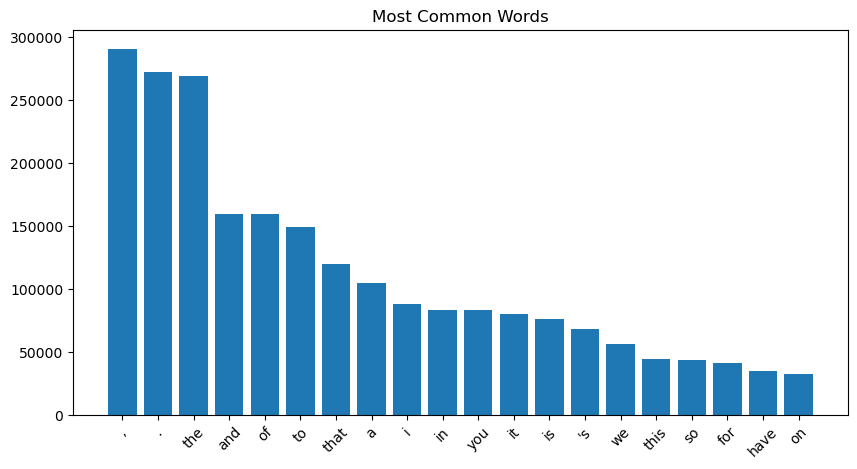

[['only',
  'the',
  'portion',
  'of',
  'the',
  'investment',
  'that',
  'was',
  'on',
  'ena',
  "'s",
  'balance',
  'sheet',
  'was',
  'hedged',
  '.'],
 ['if',
  'an',
  'asset',
  'is',
  'sold',
  'that',
  'has',
  'been',
  'raptorized',
  ',',
  'the',
  'swap',
  'will',
  'need',
  'to',
  'be',
  'promptly',
  'terminatednotional',
  'amounts',
  'adjusted',
  'etc',
  '.'],
 ['again',
  ',',
  'give',
  'us',
  'as',
  'much',
  'notice',
  'as',
  'you',
  'can.3',
  '.'],
 ['we',
  'also',
  'need',
  'notice',
  '(',
  'ahead',
  'of',
  'time',
  ')',
  'of',
  'any',
  'follow',
  'on',
  'investments',
  'in',
  'the',
  'same',
  'merchant',
  'assets',
  ',',
  'exchanges',
  'of',
  'our',
  'interest',
  'or',
  'further',
  'fundings',
  'because',
  'stuff',
  'will',
  'have',
  'to',
  'be',
  'done',
  '.'],
 ['i',
  'will',
  'not',
  'bore',
  'you',
  'with',
  'the',
  'details',
  ',',
  'but',
  'this',
  'stuff',
  'can',
  'not',
  'be',
  'don

In [ ]:
analyze_tokens(ds_processed)
ds_processed

## Baseline dataset sanity check ##

100%|██████████| 2886/2886 [00:04<00:00, 611.80it/s]


Vocabulary Size: 65803
Most Common Words:
[("'s", 40599), ('that', 24149), ('think', 18979), ('know', 16919), ('people', 16134), ('one', 14792), ('would', 13612), ('there', 13107), ('right', 12323), ('it', 9899), ('going', 9644), ('really', 9578), ('also', 9109), ('get', 8920), ('well', 8871), ('way', 8762), ('time', 8737), ('yeah', 8528), ('world', 8431), ('things', 8030)]
Stopword Ratio: 5.32%



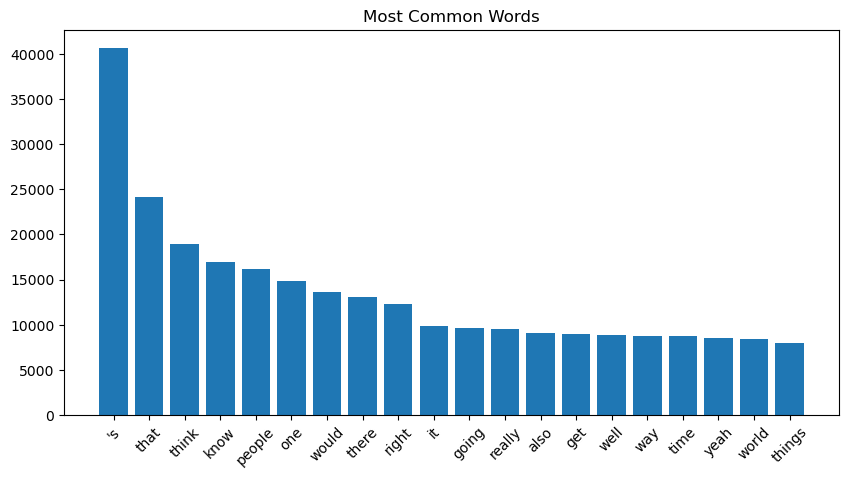

In [ ]:
basedline_ds_processed = preprocess_corpus(baseline_dataset)
analyze_tokens(basedline_ds_processed)